<a href="https://colab.research.google.com/github/tawadesharad/Exploratory-Data-Analysis-Superstore-Dataset/blob/main/EDA_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SPARK FOUNDATION INTERNSHIP**

#**Exploratory data analysis on superstore dataset**

**Name:- SHARAD SHANTARAM TAWADE**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spark Foundation/EDA-Superstore/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**There are no null values in the dataset.**

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


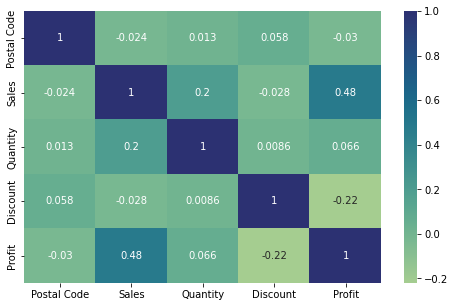

In [8]:
plt.subplots(figsize=(8,5))
sns.heatmap(df.corr(),cmap='crest',annot=True)
plt.show()

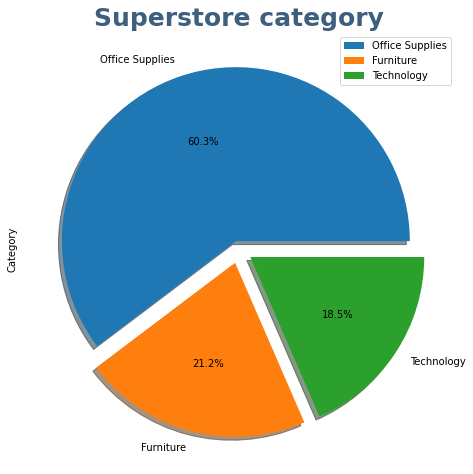

In [9]:
plt.subplots(figsize=(10,8))
categ=df['Category'].value_counts()
categ.plot.pie(autopct="%1.1f%%",shadow=True,explode=(0.05,0.08,0.08))
plt.title('Superstore category',weight='bold',fontsize=25,color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.legend(loc='upper right')
plt.show()

In [10]:
qty=df[['Category','Quantity']].groupby('Category')['Quantity'].sum()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


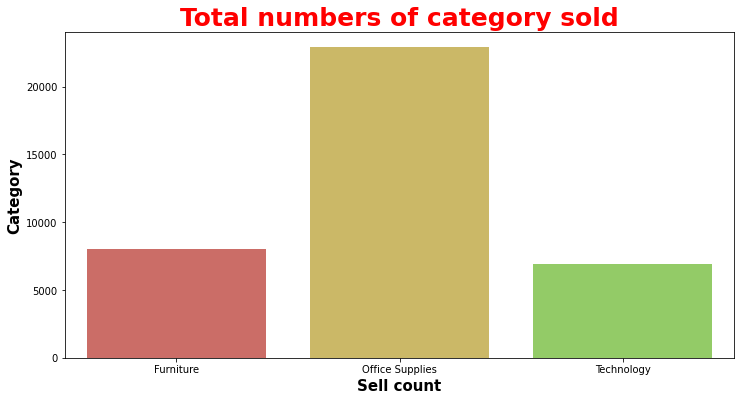

In [11]:
plt.subplots(figsize=(12,6))
sns.barplot(qty.index,qty.values,palette=sns.color_palette("hls", 8))
plt.title('Total numbers of category sold',weight='bold',fontsize=25,color='red')
plt.xlabel('Sell count',weight='bold',fontsize=15)
plt.ylabel('Category',weight='bold',fontsize=15)
plt.xticks(rotation= 0)
plt.show()

In [12]:
sales_by_city=df[['City','Sales']].groupby('City').sum().sort_values(by='Sales',ascending=False).head(10)
sales_by_city.index

Index(['New York City', 'Los Angeles', 'Seattle', 'San Francisco',
       'Philadelphia', 'Houston', 'Chicago', 'San Diego', 'Jacksonville',
       'Springfield'],
      dtype='object', name='City')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


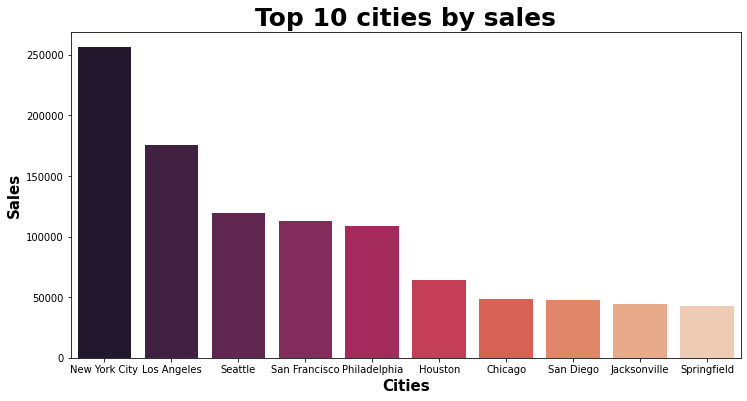

In [13]:
plt.subplots(figsize=(12,6))
sns.barplot(sales_by_city.index, sales_by_city['Sales'],palette='rocket')
plt.title('Top 10 cities by sales',Weight='bold', fontsize=25)
plt.xlabel('Cities',weight='bold',fontsize=15)
plt.ylabel('Sales',weight='bold',fontsize=15)
plt.show()

In [14]:
df.head(1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136


In [15]:
profitable_city=df[['City','Profit']].groupby('City').sum().sort_values(by='Profit',ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


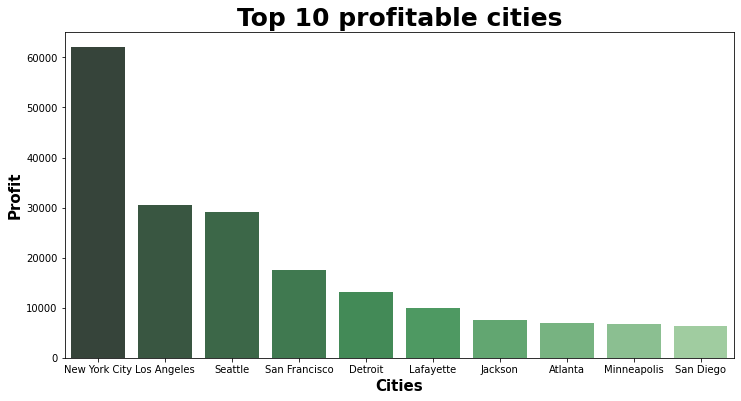

In [16]:
plt.subplots(figsize=(12,6))
pal = sns.color_palette("Greens_d", len(profitable_city))
sns.barplot(profitable_city.index, profitable_city['Profit'],palette=np.array(pal[::-1]))
plt.title('Top 10 profitable cities', weight='bold', fontsize=25)
plt.xlabel('Cities', weight='bold', fontsize=15)
plt.ylabel('Profit', weight='bold', fontsize=15)
plt.show()